In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [2]:
path = r""

In [3]:
labels = {'broadleaf':0, 'grass':1, 'soil':2, 'soybean':3}

In [4]:
files = []
doc = {}
for sub_dir in ['broadleaf', 'grass', 'soil', 'soybean']:
    for file in os.listdir(os.path.join(path, sub_dir)):
        image = cv2.imread(os.path.join(path, sub_dir, file))
        image = cv2.resize(image, (100,100))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.flatten()
        doc = {'label': labels[sub_dir],'image': image}
        files.append(doc)    
img = pd.DataFrame(files, dtype='int')

using subset of the data only due to computer performance

In [5]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
image    80 non-null object
label    80 non-null int32
dtypes: int32(1), object(1)
memory usage: 1.0+ KB


In [6]:
y = pd.get_dummies(img['label'])
y = y.values
x = np.array([img['image'][i] for i in range(len(img))])

In [10]:
y.astype(float)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [11]:
x.astype(float)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=120, shuffle=True, stratify=y)

In [14]:
X_train = X_train/255
X_test = X_test/255

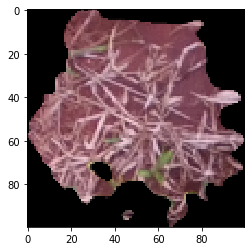

In [15]:
plt.imshow(X_train[0].reshape(100,100,3))

In [16]:
from sklearn.metrics import accuracy_score
from keras.models import Sequential
import keras
from keras.layers import Dense,Activation, Dropout
from keras.losses import categorical_crossentropy

Using TensorFlow backend.


In [17]:
model = Sequential()
model.add(Dense(500, activation='sigmoid'))
model.add(Dense(500, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
model.fit(X_train, y_train, batch_size=100,
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 56 samples, validate on 24 samples
Epoch 1/50
56/56 [==============================] - 0s 5ms/step - loss: 0.0081 - acc: 1.0000 - val_loss: 1.3645 - val_acc: 0.6250
Epoch 2/50
56/56 [==============================] - 0s 5ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 1.3717 - val_acc: 0.6250
Epoch 3/50
56/56 [==============================] - 0s 5ms/step - loss: 0.0064 - acc: 1.0000 - val_loss: 1.3786 - val_acc: 0.6250
Epoch 4/50
56/56 [==============================] - 0s 5ms/step - loss: 0.0067 - acc: 1.0000 - val_loss: 1.3852 - val_acc: 0.6250
Epoch 5/50
56/56 [==============================] - 0s 5ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 1.3913 - val_acc: 0.6250
Epoch 6/50
56/56 [==============================] - 0s 5ms/step - loss: 0.0061 - acc: 1.0000 - val_loss: 1.3964 - val_acc: 0.6250
Epoch 7/50
56/56 [==============================] - 0s 5ms/step - loss: 0.0060 - acc: 1.0000 - val_loss: 1.4005 - val_acc: 0.6250
Epoch 8/50
56/56 [============================

In [22]:
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.save("rps.h5")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               15000500  
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2004      
Total params: 15,253,004
Trainable params: 15,253,004
Non-trainable params: 0
_________________________________________________________________
